In [29]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import stats
from scipy.stats import ttest_ind

In [30]:
original_dms_data = pd.read_csv("/Users/liza/Desktop/Bioinfo Project/DMS_data/GFP_AEQVI_Sarkisyan_2016.csv")
only_scores_column = original_dms_data['DMS_score']
df_only_scores_column = pd.DataFrame(only_scores_column)
only_mutant_column = original_dms_data['mutant']


In [31]:
list_mut_count_in_progress = []
for i in range(len(only_mutant_column)):
    list_mut_count_in_progress.append(only_mutant_column.iloc[i].count(':'))
list_mut_count_prae = np.array(list_mut_count_in_progress)
list_mut_count = (list_mut_count_prae + 1)
df_mutation_counts = pd.DataFrame(list_mut_count)

In [32]:
type(df_mutation_counts)

scores_plus_counts = df_only_scores_column.join(df_mutation_counts)
scores_plus_counts.columns = ['fscores', 'mutation_count']

In [33]:
#the fscores sorted after mut_count
one_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 1)]
two_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 2)]
three_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 3)]
four_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 4)]
five_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 5)]
six_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 6)]
seven_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 7)]
eight_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 8)]
nine_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 9)]
ten_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 10)]
eleven_mutation_fscores = scores_plus_counts[(scores_plus_counts['mutation_count'] == 11)]

# nur die functional scores zu den jeweiligen mutations counts

In [34]:
#example variances
print(np.var(one_mutation_fscores))
print(np.var(two_mutation_fscores))
print(np.var(three_mutation_fscores))

fscores           0.386754
mutation_count    0.000000
dtype: float64
fscores           0.480284
mutation_count    0.000000
dtype: float64
fscores           0.862342
mutation_count    0.000000
dtype: float64


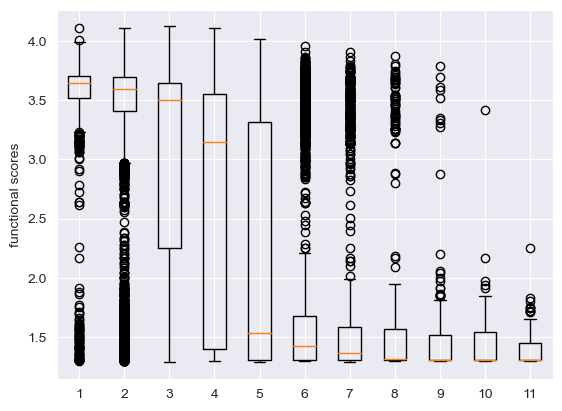

In [28]:
import matplotlib.pyplot as plt

#boxplots to show the distribution of the fscores of each group
plt.boxplot([one_mutation_fscores['fscores'], two_mutation_fscores['fscores'],three_mutation_fscores['fscores'], four_mutation_fscores['fscores'], five_mutation_fscores['fscores'],six_mutation_fscores['fscores'], seven_mutation_fscores['fscores'], eight_mutation_fscores['fscores'], nine_mutation_fscores['fscores'], ten_mutation_fscores['fscores'], eleven_mutation_fscores['fscores']])

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['1','2','3','4','5','6','7','8','9','10','11'])
plt.ylabel('functional scores')

plt.show()

In [73]:
# mann- whitney-u-test
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(eight_mutation_fscores, seven_mutation_fscores)
if p_value[0] > 0.01:
    print('kein signifikanter Unterschied')
else:
    print('signifikanter Unterschied')

kein signifikanter Unterschied
